In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import json
import torchvision.models as models
import model_helper
from PIL import Image
import math
import cv2

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
#data
data_dir = "flower_data"
train_dir =  data_dir + "/train"
valid_dir =  data_dir + "/valid"
#categories names
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
len(cat_to_name)

102

In [4]:
train_loader = model_helper.create_dataloaders(train_dir) 
valid_loader = model_helper.create_dataloaders(valid_dir)

In [5]:
#Visualise some of the data
dataiterator = iter(train_loader)
imgs, labels = dataiterator.next()
imgs = imgs.numpy()
labels = labels.numpy()
print(imgs.shape)
print(labels.shape)

(64, 3, 224, 224)
(64,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

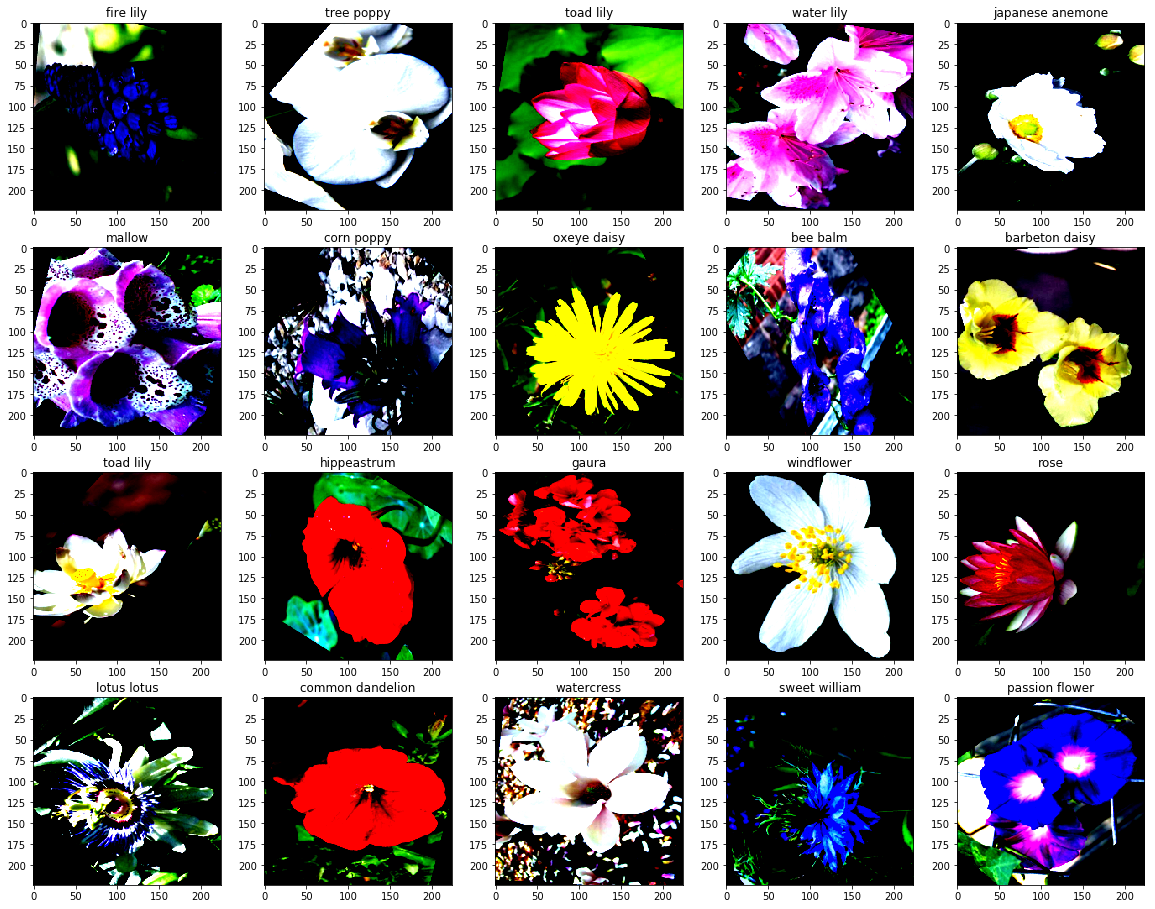

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
for indx in range(20):
    ax = fig.add_subplot(5,5,indx+1)
    plt.imshow(np.transpose((imgs[indx])))
    ax.set_title(cat_to_name[str(labels[indx]+1)])

In [7]:
model, criterion, optimizer = model_helper.create_model(model_name='resnet50')
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [ ]:
model_helper.train_model(model,device,train_loader,valid_loader,criterion,optimizer,100)

In [9]:
model.load_state_dict(torch.load('model.pt'))

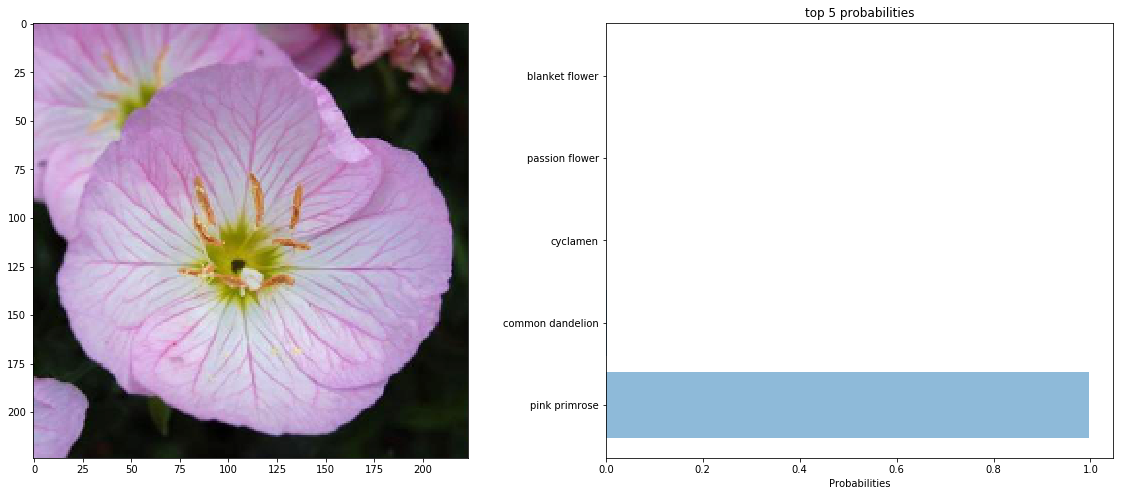

In [10]:
model_helper.predict('flower_data/valid/1/image_06769.jpg',model.to(device),device,cat_to_name,topk=5)

In [11]:
correct = 0
image_per_class = np.zeros(102)
correct_classes = np.zeros(102)
model.to(device)
model.eval()
batch = 0
for images, labels in valid_loader:
    batch +=1
    print("Batch #{}".format(batch))
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        predictions = model(images)
    for i,label in enumerate(labels):
        image_per_class[label] += 1
        if label == predictions[i].topk(1)[1][0]:
            correct_classes[label] += 1 

Batch #1
Batch #2
Batch #3
Batch #4
Batch #5
Batch #6
Batch #7
Batch #8
Batch #9
Batch #10
Batch #11
Batch #12
Batch #13


In [12]:
for ii in range(102):
    print("class {} \t\tprediction Accuracy :\t{}%".format(str(ii+1),correct_classes[ii]*100/image_per_class[ii]))

class 1 		prediction Accuracy :	100.0%
class 2 		prediction Accuracy :	100.0%
class 3 		prediction Accuracy :	100.0%
class 4 		prediction Accuracy :	60.0%
class 5 		prediction Accuracy :	100.0%
class 6 		prediction Accuracy :	60.0%
class 7 		prediction Accuracy :	100.0%
class 8 		prediction Accuracy :	100.0%
class 9 		prediction Accuracy :	100.0%
class 10 		prediction Accuracy :	100.0%
class 11 		prediction Accuracy :	100.0%
class 12 		prediction Accuracy :	100.0%
class 13 		prediction Accuracy :	90.9090909090909%
class 14 		prediction Accuracy :	50.0%
class 15 		prediction Accuracy :	100.0%
class 16 		prediction Accuracy :	100.0%
class 17 		prediction Accuracy :	100.0%
class 18 		prediction Accuracy :	100.0%
class 19 		prediction Accuracy :	91.66666666666667%
class 20 		prediction Accuracy :	100.0%
class 21 		prediction Accuracy :	100.0%
class 22 		prediction Accuracy :	66.66666666666667%
class 23 		prediction Accuracy :	100.0%
class 24 		prediction Accuracy :	100.0%
class 25 		predic

In [17]:
print("Total Accuracy : {:.2f}% ".format(correct_classes.sum(axis=0)*100/image_per_class.sum(axis=0)))

Total Accuracy : 90.10% 
